In [1]:
pip install statsmodels

In [2]:
pip install -U scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 33.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

In [5]:
uploaded = files.upload()

Saving ToyotaCorolla - MLR.csv to ToyotaCorolla - MLR.csv


In [6]:
Corolla = pd.read_csv("ToyotaCorolla - MLR.csv")
print(Corolla.head())

   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  


In [7]:
print(Corolla.tail())

      Price  Age_08_04     KM Fuel_Type   HP  Automatic    cc  Doors  \
1431   7500         69  20544    Petrol   86          0  1300      3   
1432  10845         72  19000    Petrol   86          0  1300      3   
1433   8500         71  17016    Petrol   86          0  1300      3   
1434   7250         70  16916    Petrol   86          0  1300      3   
1435   6950         76      1    Petrol  110          0  1600      5   

      Cylinders  Gears  Weight  
1431          4      5    1025  
1432          4      5    1015  
1433          4      5    1015  
1434          4      5    1015  
1435          4      5    1114  


In [8]:
Corolla.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [9]:
Corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [10]:
Corolla.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [11]:
cat_cols=Corolla.select_dtypes(include=['object']).columns
num_cols =Corolla.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Fuel_Type'], dtype='object')
Numerical Variables:
['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']


Data Visualization


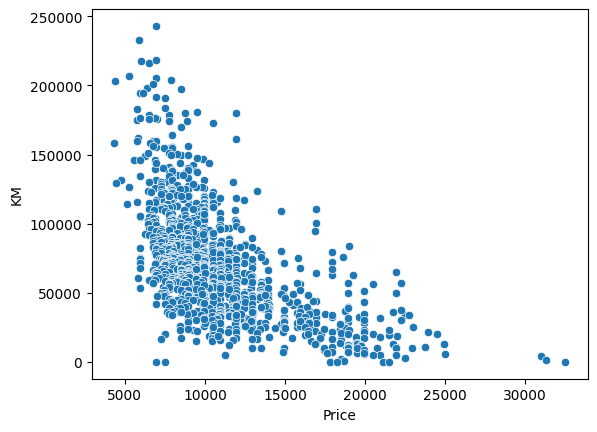

In [12]:
sns.scatterplot(x='Price',y='KM', data=Corolla,)
plt.show()

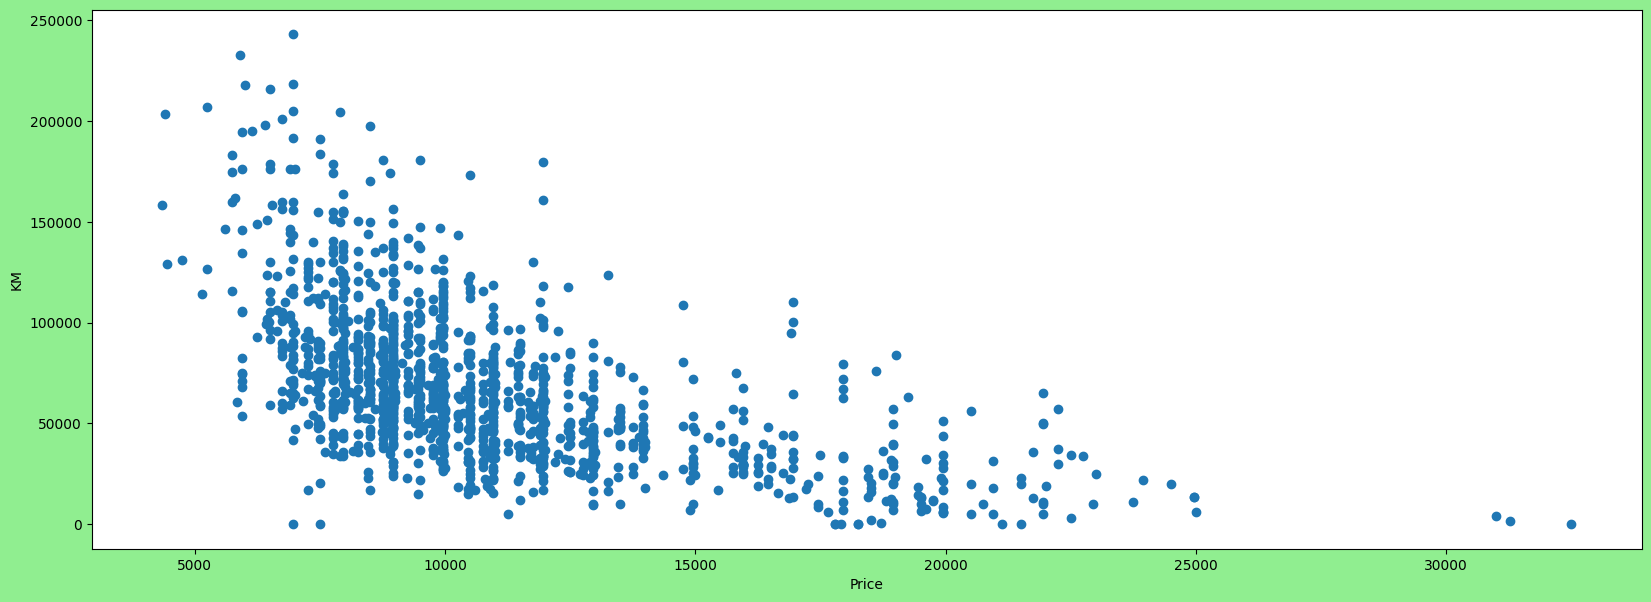

In [ ]:
plt.figure(figsize=(20,7),facecolor="lightgreen")
plt.scatter(Corolla.Price,Corolla.KM)
plt.xlabel("Price");
plt.ylabel("KM")
plt.show()

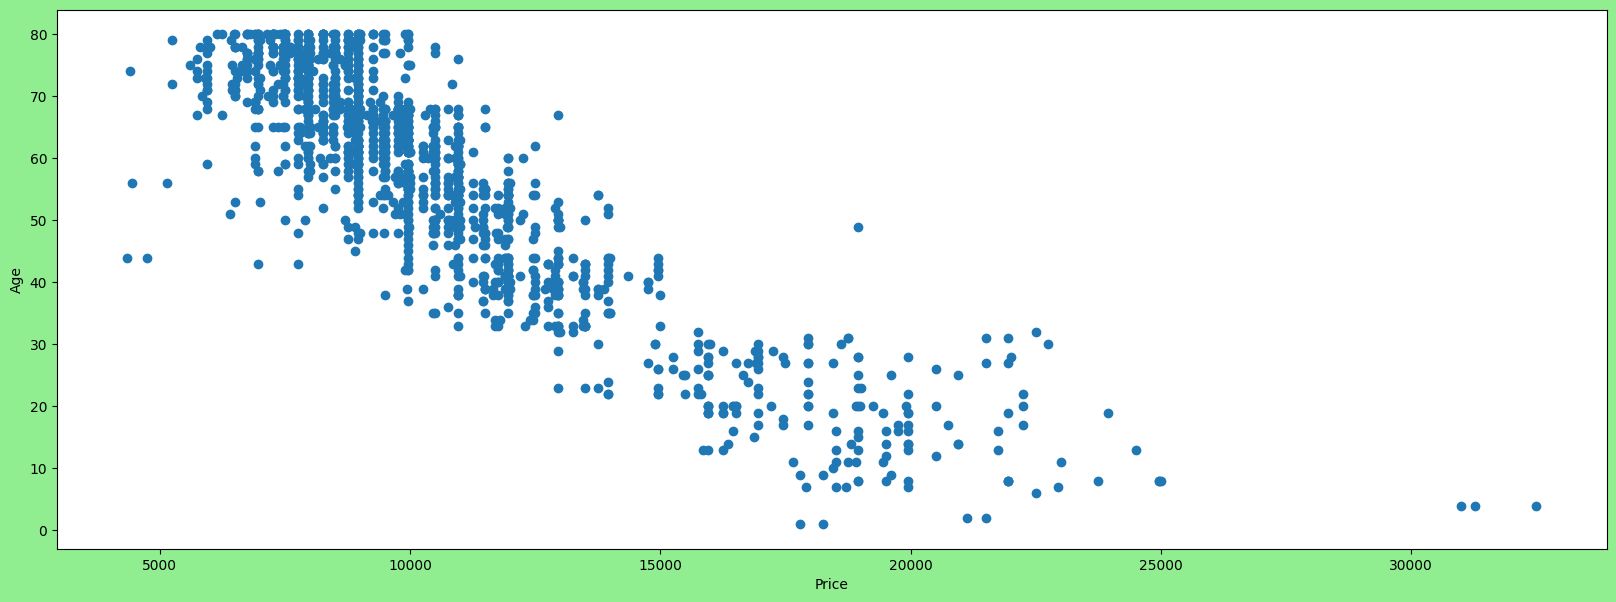

In [ ]:
plt.figure(figsize=(20,7),facecolor="lightgreen")
plt.scatter(Corolla.Price,Corolla.Age_08_04)
plt.xlabel("Price");
plt.ylabel("Age")
plt.show()

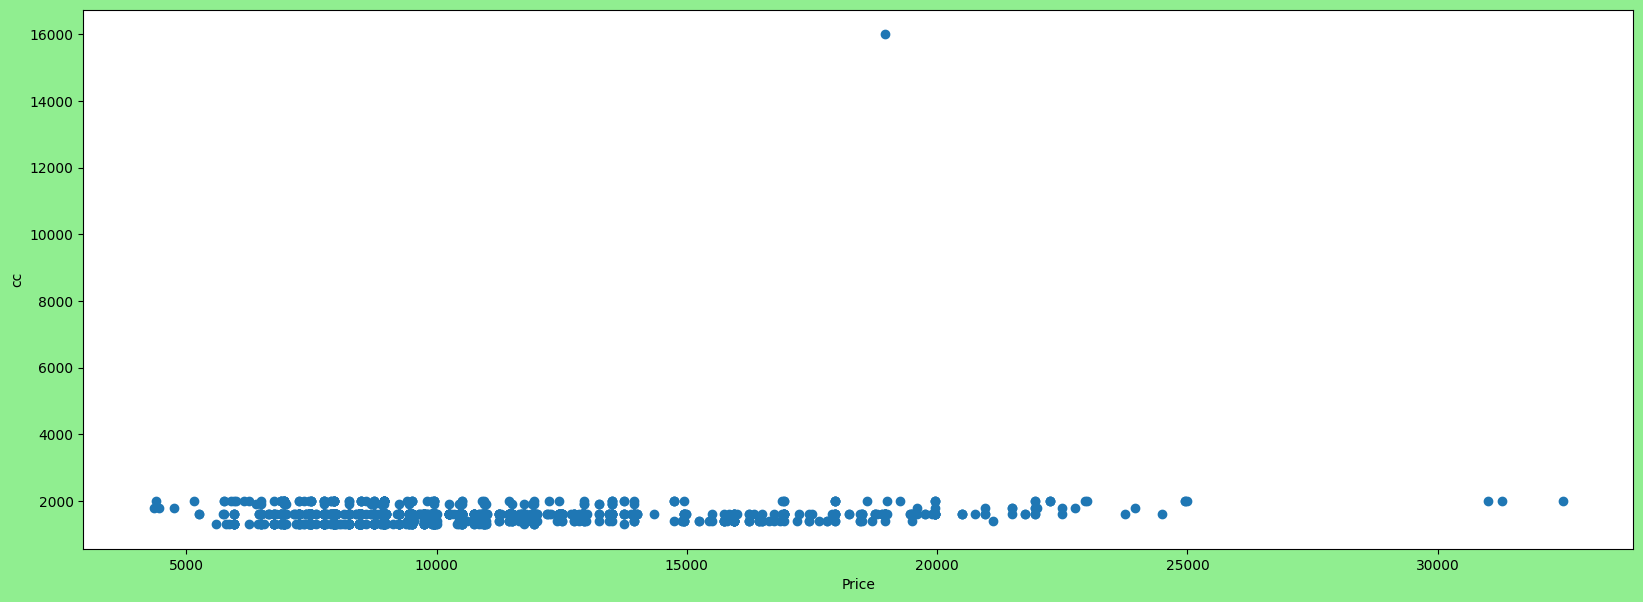

In [ ]:
#Price VS CC
plt.figure(figsize=(20,7),facecolor="lightgreen")
plt.scatter(Corolla.Price,Corolla.cc)
plt.xlabel("Price");
plt.ylabel("cc")
plt.show()

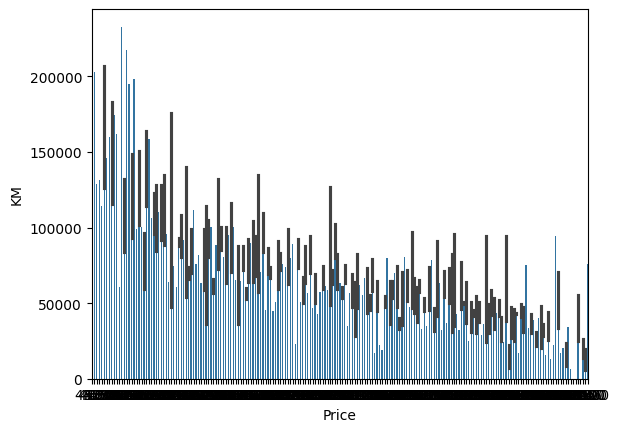

In [ ]:
sns.barplot(x='Price',y='KM', data=Corolla,width=0.5)
plt.xlim(0, 200)
plt.show()

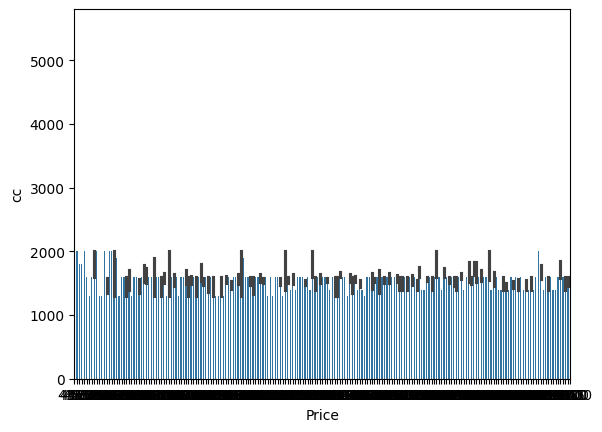

In [ ]:
sns.barplot(x='Price',y='cc', data=Corolla,width=0.5)
plt.xlim(0, 200)
plt.show()

(array([ 29., 277., 510., 245., 163.,  49.,  57.,  47.,  30.,  20.,   6.,
          0.,   0.,   0.,   3.]),
 array([ 4350.        ,  6226.66666667,  8103.33333333,  9980.        ,
        11856.66666667, 13733.33333333, 15610.        , 17486.66666667,
        19363.33333333, 21240.        , 23116.66666667, 24993.33333333,
        26870.        , 28746.66666667, 30623.33333333, 32500.        ]),
 <BarContainer object of 15 artists>)

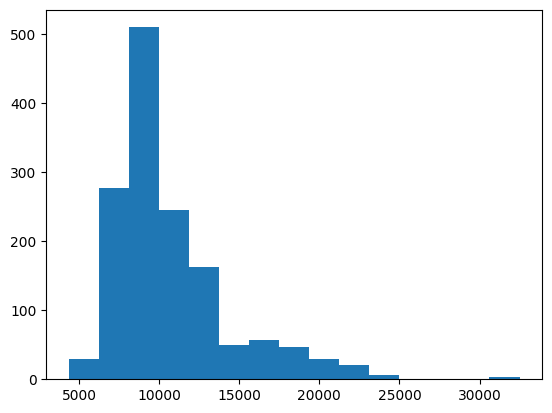

In [13]:
plt.hist(Corolla['Price'], bins=15)

(0.0, 200.0)

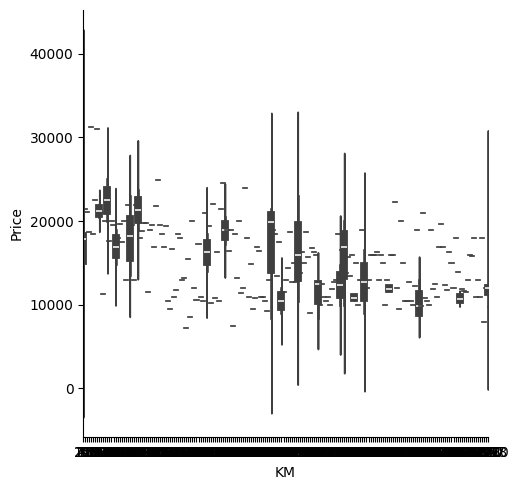

In [ ]:

sns.catplot(x='KM', y='Price', kind='violin', data=Corolla, width=2,)
plt.xlim(0, 200)


Split the dataset

In [14]:
X = Corolla['Price']
Y = Corolla['KM']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y , random_state=104,test_size=0.2, shuffle=True)

# Model Creation-1(Price vs KM)

# Model with SKLEARN

In [15]:
Corolla["KM"].values.reshape(-1,1)

array([[46986],
       [72937],
       [41711],
       ...,
       [17016],
       [16916],
       [    1]])

In [16]:
Corolla["Price"].values.reshape(-1,1)

array([[13500],
       [13750],
       [13950],
       ...,
       [ 8500],
       [ 7250],
       [ 6950]])

In [17]:
lm = LinearRegression()

X = Corolla["Price"].values.reshape(-1,1)
Y = Corolla["KM"].values.reshape(-1,1)

lm.fit(X,Y)

LinearRegression()

In [18]:
print (lm.coef_)#alpha
print (lm.intercept_)#beta

[[-5.89395933]]
[131780.30304928]


In [19]:
lm.predict(X)

array([[52211.85203675],
       [50738.36220318],
       [49559.57033633],
       ...,
       [81681.64870806],
       [89049.09787589],
       [90817.28567616]])

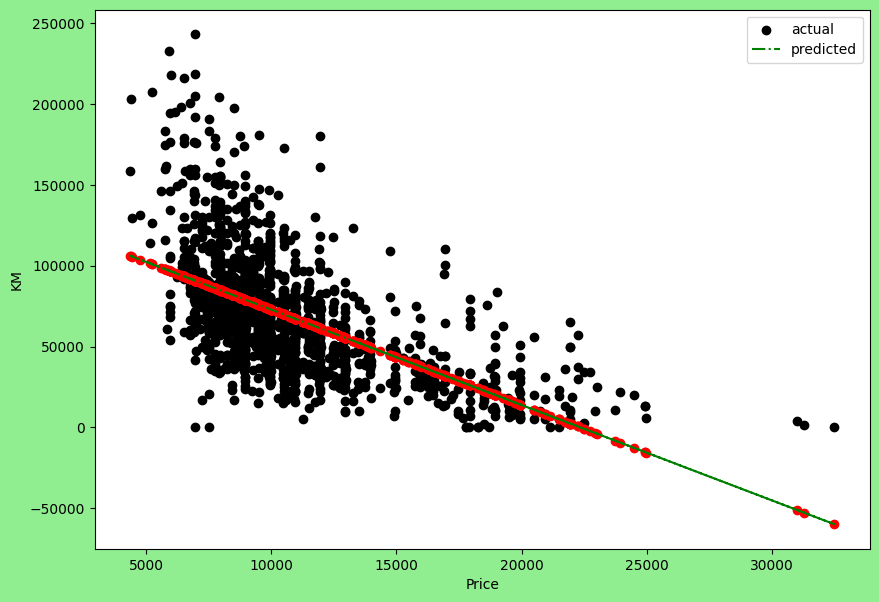

In [20]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(Corolla.Price,(Corolla.KM),color="black",label="actual");
plt.plot(Corolla.Price,lm.predict(X),label="predicted",color="green",linestyle="-.");
plt.scatter(Corolla.Price,lm.predict(X),color="red")
plt.xlabel("Price");
plt.ylabel("KM")
plt.legend(loc="best")
plt.show()




Model Validation

In [21]:
pred_train_lm =lm.predict(X)
r2_score(Corolla["KM"],pred_train_lm)

0.3248545891553044

# Model Creation--2(Price vs Age of the car)

# Model with statsmodels

In [22]:
second_model = smf.ols("Price~Age_08_04",data=Corolla).fit()

In [23]:
second_model .params

Intercept    20294.058649
Age_08_04     -170.933585
dtype: float64

In [24]:
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        17:42:16   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
Age_08_04   -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
second_model.resid

0      -2862.586194
1      -2612.586194
2      -2241.652609
3       -899.785439
4      -1416.051099
           ...     
1431    -999.641283
1432    2858.159472
1433     342.225887
1434   -1078.707698
1435    -353.106188
Length: 1436, dtype: float64

In [33]:
second_model.predict()

array([16362.58619364, 16362.58619364, 16191.65260863, ...,
        8157.77411309,  8328.7076981 ,  7303.10618803])

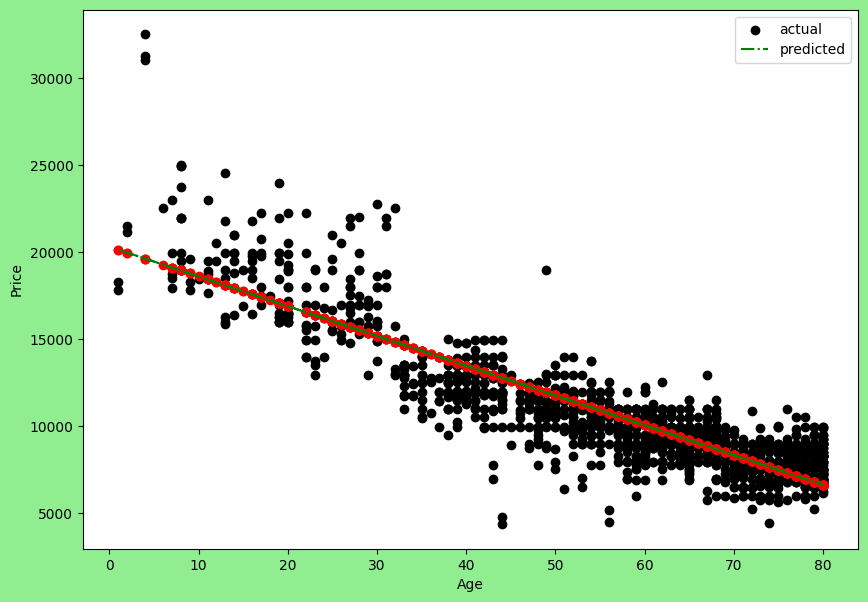

In [34]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(Corolla.Age_08_04,(Corolla.Price),color="black",label="actual");
plt.plot(Corolla.Age_08_04,second_model.predict(),label="predicted",color="green",linestyle="-.");
plt.scatter(Corolla.Age_08_04,second_model.predict(),color="red")
plt.xlabel("Age");
plt.ylabel("Price")
plt.legend(loc="best")
plt.show()






# Model Creation--3(Price vs Age of the car)


Model with OLS Regression

In [35]:
third_model= smf.ols('np.log(Price)~(Age_08_04)',data=Corolla).fit()
third_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(Price)   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4763.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        17:58:29   Log-Likelihood:                 760.88
No. Observations:                1436   AIC:                            -1518.
Df Residuals:                    1434   BIC:                            -1507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.0149      0.012    839.666      0.000       9.991      10.038
Age_08_04     -0.0140      0.000    -69.016      0.000      -0.014      -0.014
==============================================================================
Omnibus:                      298.999   Durbin-Watson:                   1.507
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1518.908
Skew:                          -0.878   Prob(JB):                         0.00
Kurtosis:                       7.722   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
Corolla["Price_Sq"] = Corolla.Price**2
model_quad = smf.ols("np.log(Age_08_04)~Price+Price_Sq",data=Corolla).fit()
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      np.log(Age_08_04)   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     2417.
Date:                Sun, 05 May 2024   Prob (F-statistic):               0.00
Time:                        17:58:39   Log-Likelihood:                -15.614
No. Observations:                1436   AIC:                             37.23
Df Residuals:                    1433   BIC:                             53.04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0326      0.053     94.609      0.000       4.928       5.137
Price      -8.644e-05   8.28e-06    -10.442      0.000      -0.000   -7.02e-05
Price_Sq   -1.347e-09   2.93e-10     -4.603      0.000   -1.92e-09   -7.73e-10
==============================================================================
Omnibus:                     1229.414   Durbin-Watson:                   1.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            93897.634
Skew:                          -3.523   Prob(JB):                         0.00
Kurtosis:                      41.983   Cond. No.                     1.35e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Lasso (L1) and Ridge (L2) methods

Lasso

In [47]:
from sklearn.linear_model import Lasso

x = np.array(Corolla.loc[:,['Age_08_04','Price',]])
x_train,x_test,y_train,y_test = train_test_split(x,Y,random_state = 3, test_size = 0.3)
lasso = Lasso(alpha = 0.0001,)
lasso.fit(x_train,y_train)
ridge_predict = lasso.predict(x_test)
print('Lasso score: ',lasso.score(x_test,y_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.28640582287443817
Lasso coefficients:  [120.54876312  -5.47590966]


Ridge

In [49]:
from sklearn.linear_model import Ridge

x_train,x_test,y_train,y_test = train_test_split(x,Y,random_state = 2, test_size = 0.3)
ridge = Ridge(alpha= 0.001,)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
print("Ridge Score: ",ridge.score(x_test,y_test))

Ridge Score:  0.29732854900415584



# Interview Questions:


1.What is Normalization & Standardization and how is it helpful?

Ans.Normalization is the method used to arrange the data in a database. It is a scaling method that reduces duplication in which the numbers are scaled and moved between 0 and 1. When there are no outliers since it can't handle them, normalization is employed to remove the undesirable characteristics from the dataset.

Data standardization means the transformation of data into a consistent, standard format, making it easier to understand and use — especially for machine learning models.

2.What techniques can be used to address multicollinearity in multiple linear regression?

Ans.Multicollinearity can be addressed by removing variables with high correlation coefficients, using principal component analysis (PCA) to reduce dimensionality, or applying clustering techniques.